In [19]:
import pylab
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import seaborn as sn
from scipy import stats
from datetime import datetime
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
daily_data= pd.read_csv('train.csv')

In [6]:
daily_data.shape

(10886, 12)

In [7]:
daily_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [8]:
daily_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [12]:
daily_data["date"] = daily_data.datetime.apply(lambda x : x.split()[0])
daily_data["hour"] = daily_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
daily_data["weekday"] = daily_data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
daily_data["month"] = daily_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
daily_data["season"] = daily_data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
daily_data["weather"] = daily_data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [13]:
variable_list = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in variable_list:
    daily_data[var] = daily_data[var].astype("category")

In [14]:
daily_data = daily_data.drop(["datetime"],axis=1)

TypeError: '<' not supported between instances of 'CategoricalDtype' and 'numpy.dtype[float64]'

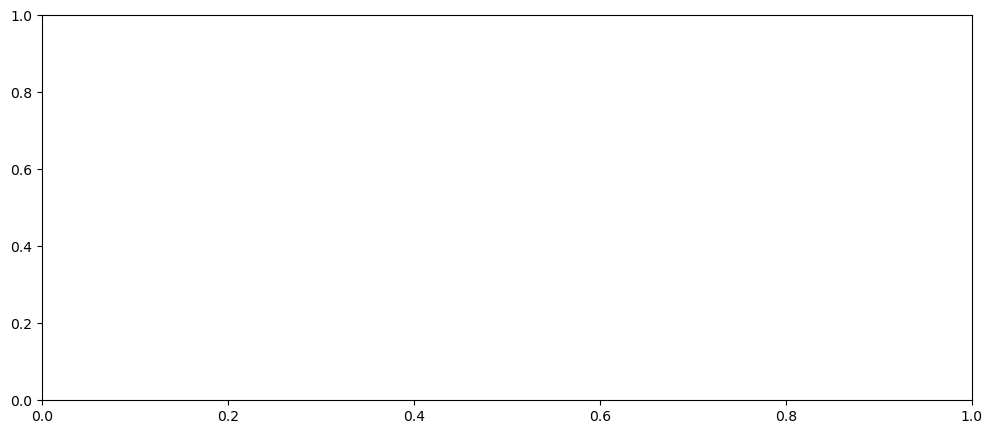

In [35]:
data_df = pd.DataFrame(daily_data.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=data_df,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableType', ylabel='count',title="Variables DataType Count")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

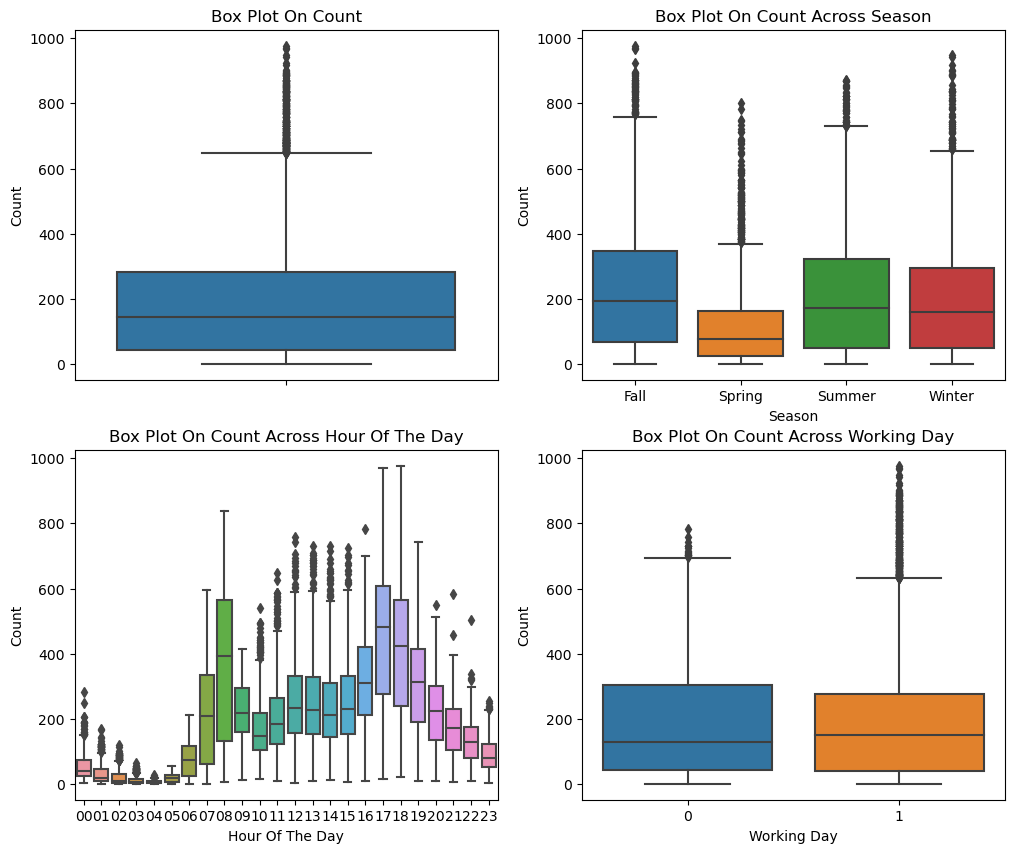

In [26]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=daily_data,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=daily_data,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=daily_data,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=daily_data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [31]:
daily_data_no_outliers = daily_data[np.abs(daily_data["count"]-daily_data["count"].mean())<=(3*daily_data["count"].std())]

In [32]:
print ("Shape Before Ouliers: ",daily_data.shape)
print ("Shape After Ouliers: ",daily_data_no_outliers.shape)

Shape Before Ouliers:  (10886, 15)
Shape After Ouliers:  (10739, 15)


<Axes: >

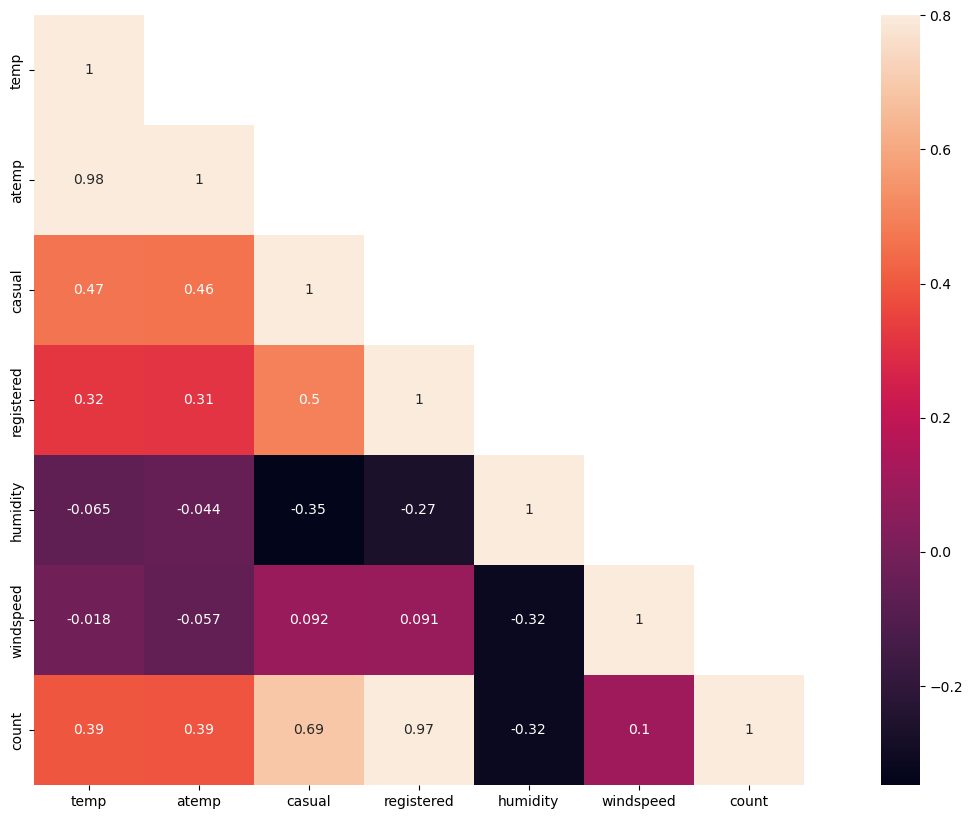

In [42]:
corr = daily_data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

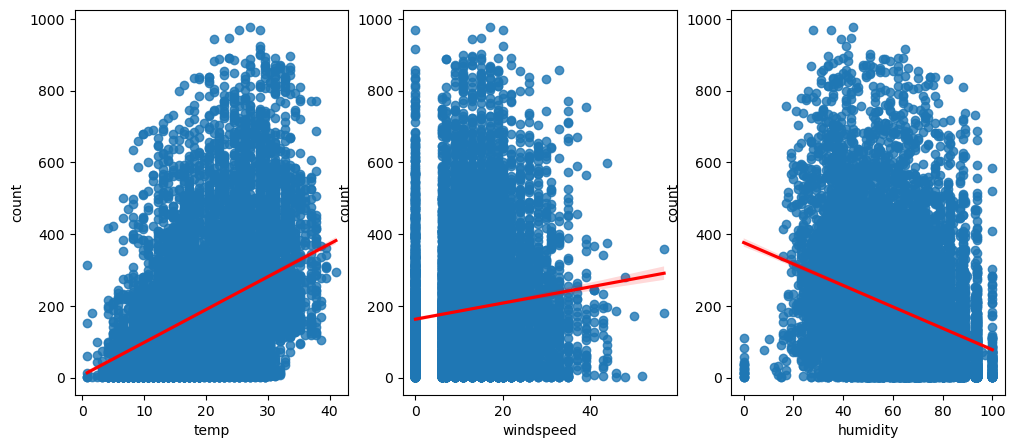

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
line_kws = {'color': 'red'}
sns.regplot(x="temp", y="count", data=daily_data, ax=ax1, line_kws=line_kws)
sns.regplot(x="windspeed", y="count", data=daily_data, ax=ax2, line_kws=line_kws)
sns.regplot(x="humidity", y="count", data=daily_data, ax=ax3, line_kws=line_kws)
plt.show()

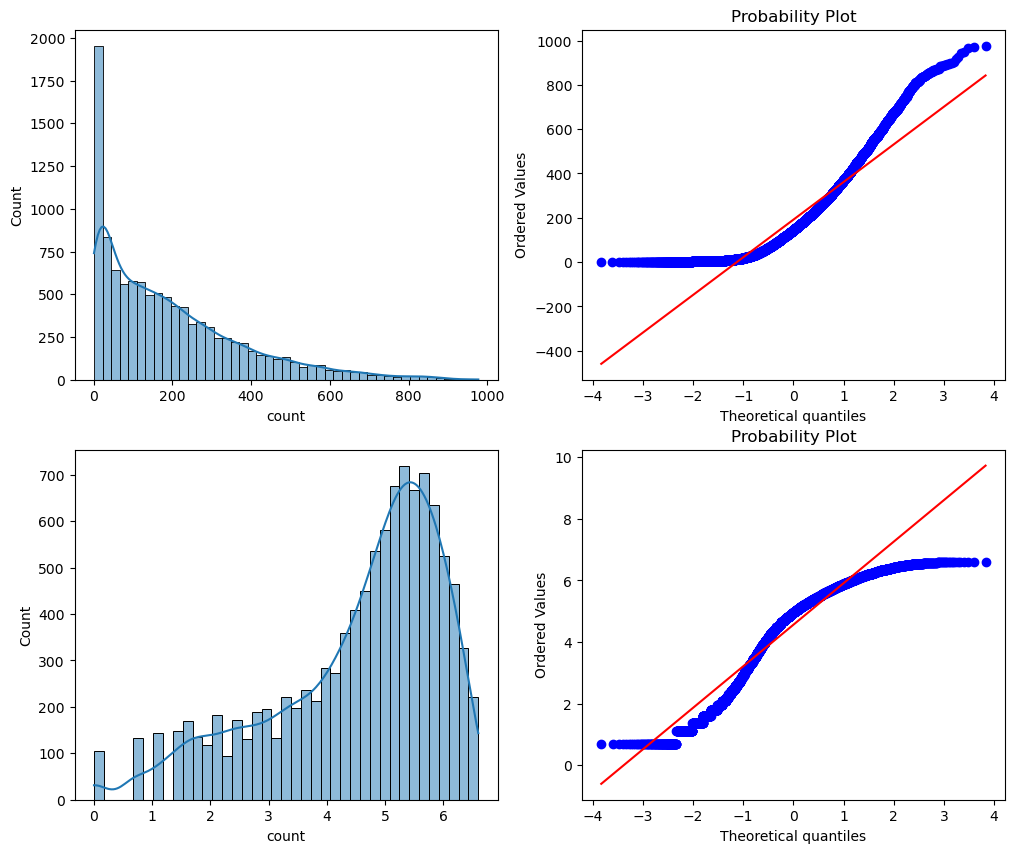

In [44]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)
sns.histplot(daily_data["count"], kde=True, ax=axes[0][0])
stats.probplot(daily_data["count"], dist='norm', fit=True, plot=axes[0][1])
sns.histplot(np.log(daily_data_no_outliers["count"]), kde=True, ax=axes[1][0])
stats.probplot(np.log1p(daily_data_no_outliers["count"]), dist='norm', fit=True, plot=axes[1][1])
plt.show()

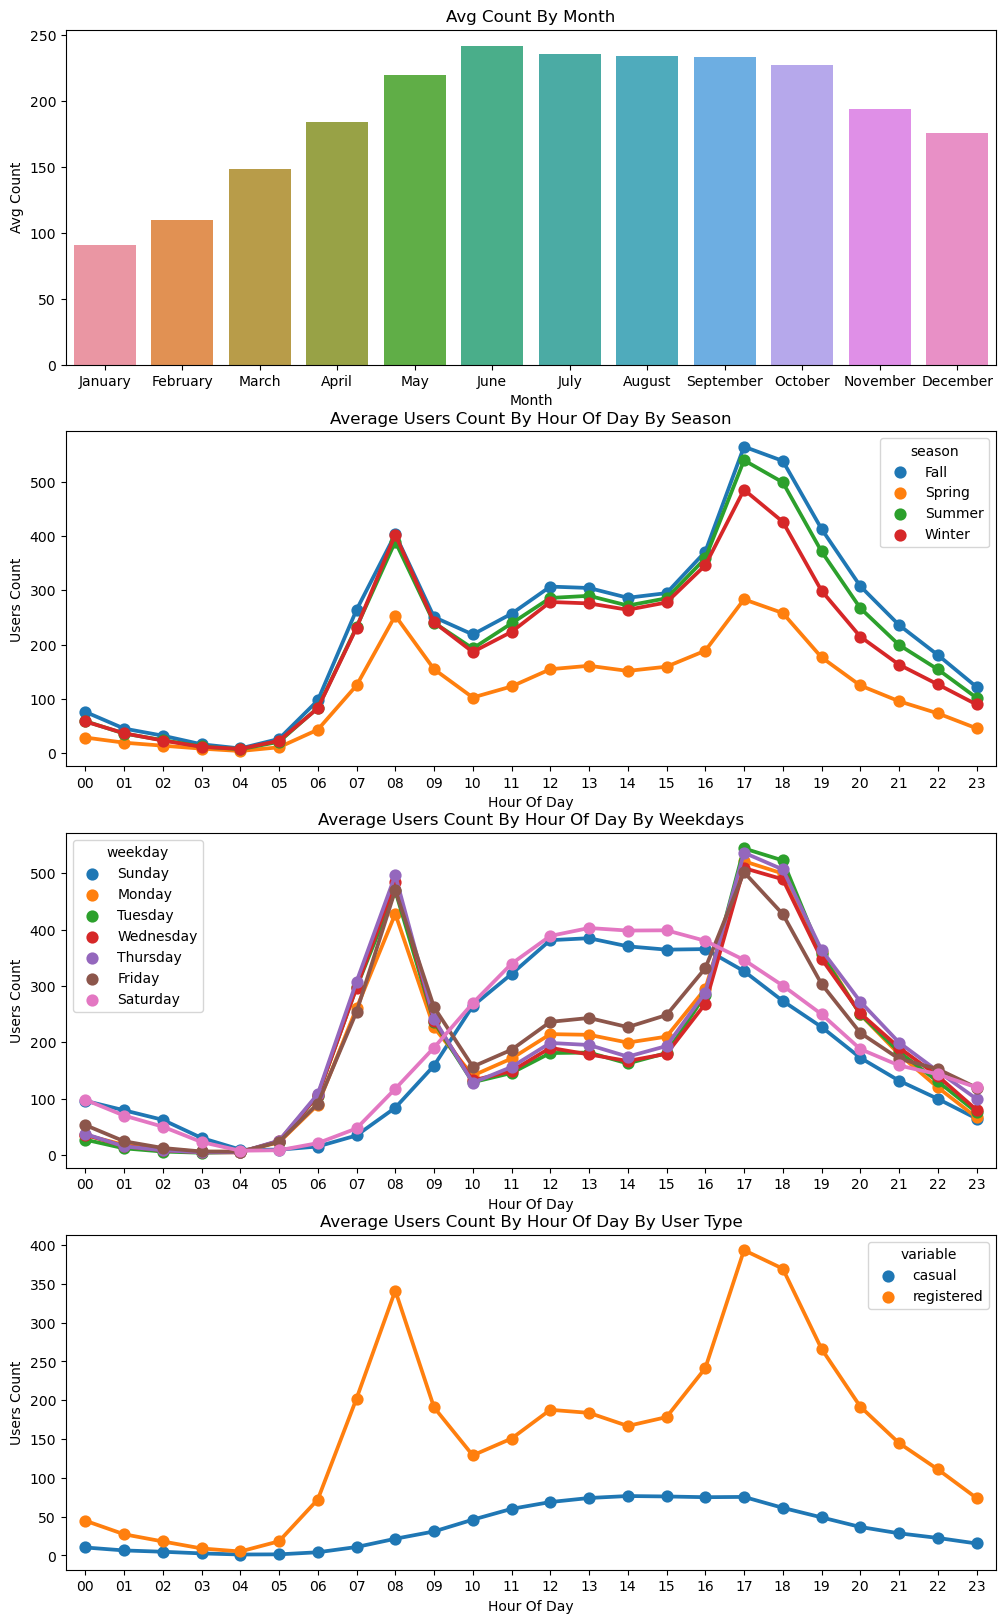

In [50]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12, 20)
sorting_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#hueOrder
hues_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

month_aggregated = daily_data.groupby("month", observed=False)["count"].mean().reindex(sorting_order)
sns.barplot(x=month_aggregated.index, y=month_aggregated.values, ax=ax1)
ax1.set(xlabel='Month', ylabel='Avg Count', title="Avg Count By Month")

hour_aggregated_season = daily_data.groupby(["hour", "season"], sort=True, observed=False)["count"].mean().reset_index()
sns.pointplot(x=hour_aggregated_season["hour"], y=hour_aggregated_season["count"], hue=hour_aggregated_season["season"], data=hour_aggregated_season, ax=ax2)
ax2.set(xlabel='Hour Of Day', ylabel='Users Count', title="Average Users Count By Hour Of Day By Season")

hour_aggregated_weekday = daily_data.groupby(["hour", "weekday"], sort=True, observed=False)["count"].mean().reset_index()
sns.pointplot(x=hour_aggregated_weekday["hour"], y=hour_aggregated_weekday["count"], hue=hour_aggregated_weekday["weekday"], hue_order=hues_order, data=hour_aggregated_weekday, ax=ax3)
ax3.set(xlabel='Hour Of Day', ylabel='Users Count', title="Average Users Count By Hour Of Day By Weekdays")

# Plot 4: Average Users Count By Hour Of The Day Across User Type
hour_transformed = pd.melt(daily_data[["hour", "casual", "registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hour_aggregated_user = hour_transformed.groupby(["hour", "variable"], sort=True, observed=False)["value"].mean().reset_index()
sns.pointplot(x=hour_aggregated_user["hour"], y=hour_aggregated_user["value"], hue=hour_aggregated_user["variable"], hue_order=["casual", "registered"], data=hour_aggregated_user, ax=ax4)
ax4.set(xlabel='Hour Of Day', ylabel='Users Count', title="Average Users Count By Hour Of Day By User Type")

# Show the plots
plt.show()


In [52]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data = pd.concat([data_train, data_test], ignore_index=True)

In [53]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
data_wind = data[data["windspeed"]==0]
data_wind_not = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
wind_columns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(data_wind_not[wind_columns], data_wind_not["windspeed"])

wind_values = rfModel_wind.predict(X=data_wind[wind_columns])
data_wind["windspeed"] = wind_values
data_wind_values = rfModel_wind.predict(data_wind[wind_columns])
data.loc[data["windspeed"] == 0, "windspeed"] = data_wind_values

In [62]:
categorical_features = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numerical_features = ["temp","humidity","windspeed","atemp"]
drop_features = ['casual',"count","datetime","date","registered"]

In [58]:
for var in categorical_features:
    data[var] = data[var].astype("category")

In [59]:
data_train = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
data_test = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
date_time = data_test["datetime"]
yLabels = data_train["count"]
yLablesRegistered = data_train["registered"]
yLablesCasual = data_train["casual"]

In [63]:
data_train = data_train.drop(drop_features,axis=1)
data_test = data_test.drop(drop_features,axis=1)

In [64]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [65]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

In [68]:
for col in data_train.columns:
    data_train[col] = pd.to_numeric(data_train[col], errors='coerce')
data_train = data_train.dropna()
lModel = LinearRegression()
yLabelsLog = np.log1p(yLabels)
lModel.fit(X=data_train, y=yLabelsLog)

preds = lModel.predict(X=data_train)
print("RMSLE Value For Linear Regression: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9779513963276267


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779513812438893


<Axes: xlabel='alpha', ylabel='rmsle'>

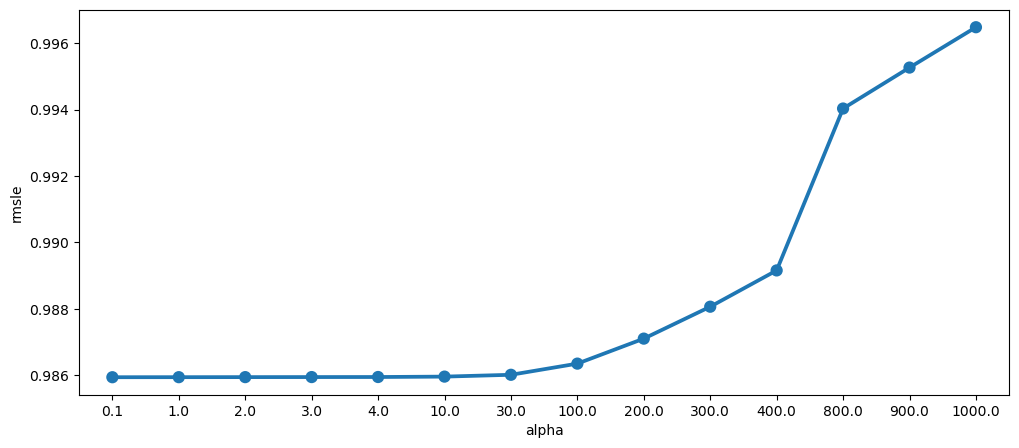

In [69]:
ridge_m = Ridge()
ridge_params_ = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m,
                            ridge_params_,
                            scoring=rmsle_scorer,
                            cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit(data_train, yLabelsLog)
preds = grid_ridge_m.predict(X=data_train)
print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x: x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x: -x)
sn.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.978088370501231


<Axes: xlabel='alpha', ylabel='rmsle'>

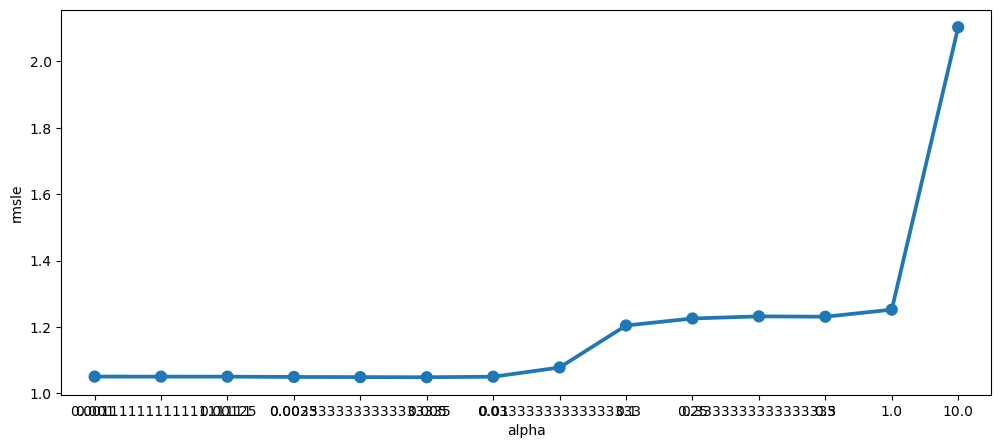

In [72]:
lasso_m = Lasso()

alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter': [3000], 'alpha': alpha}

grid_lasso_m = GridSearchCV(lasso_m, lasso_params, scoring='neg_mean_squared_error', cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit(data_train, yLabelsLog)
preds = grid_lasso_m.predict(X=data_train)
print(grid_lasso_m.best_params_)
print("RMSLE Value For Lasso Regression: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x: x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x: -x)
sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(data_train,yLabelsLog)
preds = rfModel.predict(X= data_train)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.10309940082886086


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01);
yLabelsLog = np.log1p(yLabels)
gbm.fit(data_train,yLabelsLog)
preds = gbm.predict(X= data_train)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.189729338726735


C:\Users\gfati\AppData\Local\Temp\ipykernel_16216\4074630655.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(yLabels,ax=ax1,bins=50)
C:\Users\gfati\AppData\Local\Temp\ipykernel_16216\4074630655.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.exp(predictionTest),ax=ax2,bins=50)


<Axes: ylabel='Density'>

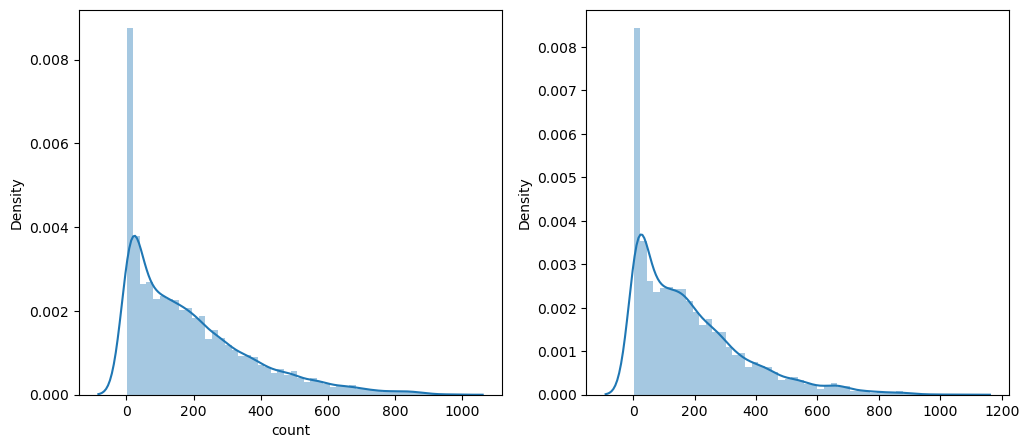

In [82]:
predictionTest = gbm.predict(X= data_test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(predictionTest),ax=ax2,bins=50)